<a href="https://colab.research.google.com/github/AnnLivio/runkeeper_data_analysis/blob/main/dont_stop_me_now.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Don't stop me now 🏃 🚴 🚶

La actividad física es fundamental para nuestra profesión, despeja la mente, haces cable a tierra, regresas con más energía y muchas veces con la solución que estabas buscando o con una perspectiva más interesante. Después de 15 años y acusando 40 tacos decidí volver a correr para tener una alternativa a salir en bicicleta (mi otra pasión). Este proyecto es el análisis de los datos recolectados en mi primer año con la app Runkeeper.

In [141]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set palette for graphics
custom_palette = ["#696960", "#b0dd60",  "#ebeb93"]
sns.set_palette(custom_palette)

In [3]:
# Load data
path = '/content/drive/MyDrive/Data Analysis/01_runkeeper_data/'
steps = pd.read_csv(path+"steps.csv")
activities = pd.read_csv(path+"cardioActivities.csv")

In [4]:
steps.head()

,Activity Id,Timestamp,Steps
0,9bb39687-b349-4323-860a-07eeae2099f1,0.222,0
1,9bb39687-b349-4323-860a-07eeae2099f1,0.223,1
2,9bb39687-b349-4323-860a-07eeae2099f1,0.716,3
3,9bb39687-b349-4323-860a-07eeae2099f1,1.216,4
4,9bb39687-b349-4323-860a-07eeae2099f1,1.716,6


In [10]:
steps.info()
print(steps.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12259 entries, 0 to 12258
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Activity Id  12259 non-null  object 
 1    Timestamp   12259 non-null  float64
 2    Steps       12259 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 287.4+ KB
Index(['Activity Id', ' Timestamp', ' Steps'], dtype='object')


In [5]:
activities.head()

,Activity Id,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,9bb39687-b349-4323-860a-07eeae2099f1,2024-11-20 15:57:36,Running,NaN,9.13,53:06,5:49,10.31,708.0,77,NaN,NaN,NaN,2024-11-20-155736.gpx
1,0eaf3e9e-ae85-4902-8502-da4b16b0ae98,2024-11-18 15:54:37,Running,NaN,9.37,54:57,5:52,10.23,721.0,65,NaN,NaN,NaN,2024-11-18-155437.gpx
2,4ab671bb-f2cf-4e3d-80d4-eef6ced709ab,2024-11-14 16:31:16,Running,NaN,9.05,53:47,5:57,10.09,694.0,58,NaN,NaN,NaN,2024-11-14-163116.gpx
3,a714ffc4-3ea2-4081-bfd9-46e9d7af0a46,2024-11-12 16:12:47,Running,NaN,9.07,53:45,5:56,10.12,701.0,71,NaN,NaN,NaN,2024-11-12-161247.gpx
4,c539ad27-8eac-4efc-9c1c-8d7cfe79a4fb,2024-11-10 15:43:56,Running,NaN,9.04,52:04,5:46,10.41,701.0,77,NaN,NaN,NaN,2024-11-10-154356.gpx


In [11]:
activities.info()
print(activities.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               287 non-null    object 
 1   Date                      287 non-null    object 
 2   Type                      287 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             287 non-null    float64
 5   Duration                  287 non-null    object 
 6   Average Pace              287 non-null    object 
 7   Average Speed (km/h)      287 non-null    float64
 8   Calories Burned           287 non-null    float64
 9   Climb (m)                 287 non-null    int64  
 10  Average Heart Rate (bpm)  0 non-null      float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     11 non-null     object 
 13  GPX File                  287 non-null    object 
dtypes: float64

## Transformación de datos

In [12]:
# Drop unnecessary columns
activities.drop(columns=["Route Name", "Average Heart Rate (bpm)", "Friend's Tagged", "Notes", "GPX File"], inplace=True)


In [25]:
# Convert Date to datetime
activities['Date'] = pd.to_datetime(activities['Date'], format='ISO8601')

In [30]:
# Convert column to timedelta, handling different formats:
def convert_to_timedelta(time_str):
  # Check if time_str contains hours
  if time_str.count(':') == 2:
    return pd.to_timedelta(time_str)
  else:
    return pd.to_timedelta('00:' + time_str)


In [ ]:
# Convert Average Pace to timedelta
activities['Average Pace'] = pd.to_timedelta('00:' + activities['Average Pace'])

# Convert to float
activities['Average Pace'] = activities['Average Pace'] / np.timedelta64(1,'m')

# Round result to 2 decimals
activities['Average Pace'] = activities['Average Pace'].round(2)

In [31]:
# Convert Duration to timedelta
activities['Duration'] = activities['Duration'].apply(convert_to_timedelta)

In [38]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Activity Id           287 non-null    object         
 1   Date                  287 non-null    datetime64[ns] 
 2   Type                  287 non-null    object         
 3   Distance (km)         287 non-null    float64        
 4   Duration              287 non-null    timedelta64[ns]
 5   Average Pace          287 non-null    float64        
 6   Average Speed (km/h)  287 non-null    float64        
 7   Calories Burned       287 non-null    float64        
 8   Climb (m)             287 non-null    int64          
dtypes: datetime64[ns](1), float64(4), int64(1), object(2), timedelta64[ns](1)
memory usage: 20.3+ KB


In [37]:
activities.head()

,Activity Id,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
0,9bb39687-b349-4323-860a-07eeae2099f1,2024-11-20 15:57:36,Running,9.13,0 days 00:53:06,5.82,10.31,708.0,77
1,0eaf3e9e-ae85-4902-8502-da4b16b0ae98,2024-11-18 15:54:37,Running,9.37,0 days 00:54:57,5.87,10.23,721.0,65
2,4ab671bb-f2cf-4e3d-80d4-eef6ced709ab,2024-11-14 16:31:16,Running,9.05,0 days 00:53:47,5.95,10.09,694.0,58
3,a714ffc4-3ea2-4081-bfd9-46e9d7af0a46,2024-11-12 16:12:47,Running,9.07,0 days 00:53:45,5.93,10.12,701.0,71
4,c539ad27-8eac-4efc-9c1c-8d7cfe79a4fb,2024-11-10 15:43:56,Running,9.04,0 days 00:52:04,5.77,10.41,701.0,77


### Extracción del total de steps por actividad

In [50]:
steps = steps.groupby('Activity Id').agg({' Steps': 'max'}).reset_index()

In [58]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Activity Id  285 non-null    object
 1    Steps       285 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


In [79]:
ste = steps['Activity Id'].unique()
activities[~activities['Activity Id'].isin(ste)].head()

,Activity Id,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
161,85ae61b3-ca74-4c36-b4b1-75f5bda67345,2024-01-27 16:48:08,Cycling,22.86,0 days 01:13:35,3.22,18.64,536.0,184
279,40a24465-496f-4366-be0d-4ade14f61c5e,2023-07-12 09:15:00,Running,6.05,0 days 00:45:00,7.43,8.07,482.0,121


### Unión de activities y steps

In [94]:
# Merge activities and steps with a left join
df = pd.merge(activities, steps, on='Activity Id', how='left')
df.head()

,Activity Id,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Steps
0,9bb39687-b349-4323-860a-07eeae2099f1,2024-11-20 15:57:36,Running,9.13,0 days 00:53:06,5.82,10.31,708.0,77,9419.0
1,0eaf3e9e-ae85-4902-8502-da4b16b0ae98,2024-11-18 15:54:37,Running,9.37,0 days 00:54:57,5.87,10.23,721.0,65,9603.0
2,4ab671bb-f2cf-4e3d-80d4-eef6ced709ab,2024-11-14 16:31:16,Running,9.05,0 days 00:53:47,5.95,10.09,694.0,58,9455.0
3,a714ffc4-3ea2-4081-bfd9-46e9d7af0a46,2024-11-12 16:12:47,Running,9.07,0 days 00:53:45,5.93,10.12,701.0,71,9478.0
4,c539ad27-8eac-4efc-9c1c-8d7cfe79a4fb,2024-11-10 15:43:56,Running,9.04,0 days 00:52:04,5.77,10.41,701.0,77,9187.0


In [95]:
# Drop Activity Id column
df.drop(columns=['Activity Id'], inplace=True)

In [100]:
df['Month'] = df['Date'].dt.month
df['WeekDay'] = df['Date'].dt.day_of_week

## Export clean data

In [103]:
# Export data
df.to_csv(path+'runkeeper_cleandata.csv', index=False)

# Análisis Exploratorio, EDA

In [102]:
df.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Steps,Month,WeekDay
0,2024-11-20 15:57:36,Running,9.13,0 days 00:53:06,5.82,10.31,708.0,77,9419.0,11,2
1,2024-11-18 15:54:37,Running,9.37,0 days 00:54:57,5.87,10.23,721.0,65,9603.0,11,0
2,2024-11-14 16:31:16,Running,9.05,0 days 00:53:47,5.95,10.09,694.0,58,9455.0,11,3
3,2024-11-12 16:12:47,Running,9.07,0 days 00:53:45,5.93,10.12,701.0,71,9478.0,11,1
4,2024-11-10 15:43:56,Running,9.04,0 days 00:52:04,5.77,10.41,701.0,77,9187.0,11,6


In [104]:
df.describe(include='all')

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Steps,Month,WeekDay
count,287,287,287.000000,287,287.000000,287.000000,287.000000,287.000000,285.000000,287.000000,287.000000
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Running,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2024-02-17 21:51:03.567944448,NaN,7.620279,0 days 00:44:17.327526132,6.000976,10.299268,560.174216,64.749129,7006.059649,6.763066,2.815331
min,2023-06-28 09:25:17,NaN,2.550000,0 days 00:31:12,2.670000,4.310000,149.000000,17.000000,0.000000,1.000000,0.000000
25%,2023-10-14 04:30:08.500000,NaN,6.165000,0 days 00:36:50.500000,5.600000,9.615000,476.000000,45.000000,6225.000000,4.000000,1.000000
50%,2024-02-21 16:24:42,NaN,6.720000,0 days 00:41:12,5.800000,10.330000,515.000000,55.000000,6968.000000,7.000000,3.000000
75%,2024-05-29 03:06:39,NaN,8.110000,0 days 00:49:32.500000,6.240000,10.720000,619.500000,69.000000,7902.000000,9.000000,4.000000
max,2024-11-20 15:57:36,NaN,22.860000,0 days 01:35:05,13.920000,22.570000,1248.000000,220.000000,16729.000000,12.000000,6.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Date                  287 non-null    datetime64[ns] 
 1   Type                  287 non-null    object         
 2   Distance (km)         287 non-null    float64        
 3   Duration              287 non-null    timedelta64[ns]
 4   Average Pace          287 non-null    float64        
 5   Average Speed (km/h)  287 non-null    float64        
 6   Calories Burned       287 non-null    float64        
 7   Climb (m)             287 non-null    int64          
 8    Steps                285 non-null    float64        
 9   Month                 287 non-null    int32          
 10  WeekDay               287 non-null    int32          
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(1), timedelta64[ns](1)
memory usage: 22.5+ KB


In [91]:
df.Type.value_counts()

,count
Type,
Running,273
Walking,7
Cycling,6
Mountain Biking,1


In [107]:
# Create `replacement_dict`
replacement_dict = {'Trail Running': 'Running', 'Mountain Biking': 'Cycling' }

# Replace the incorrect values in the `Industry` column
df['Type'] = df['Type'].replace(replacement_dict)

In [127]:
df_year = df.query("(Date >= '2023-07-01') & (Date < '2024-07-01') & (Type == 'Running')")

In [ ]:
df_year['Month'] = df_year['Date'].dt.month_name()
df_year['WeekDay'] = df_year['Date'].dt.day_name()

#Create list of weekday in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create list of Month in order
month_order = ['July', 'August', 'September', 'October', 'November', 'December','January', 'February', 'March', 'April', 'May', 'June']

<Axes: xlabel='Month'>

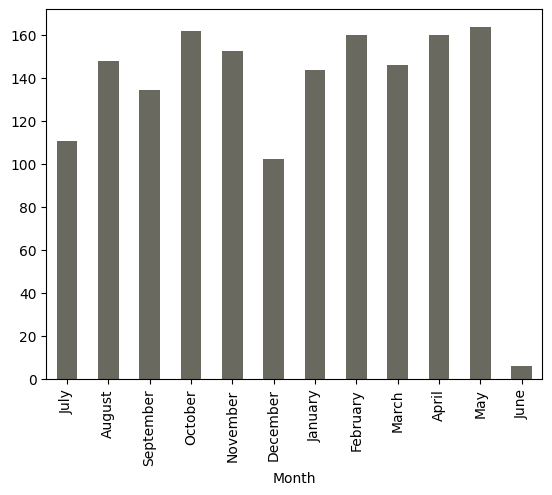

In [142]:
df_year.groupby('Month')['Distance (km)'].sum().reindex(month_order).plot(kind='bar')

<Axes: xlabel='WeekDay'>

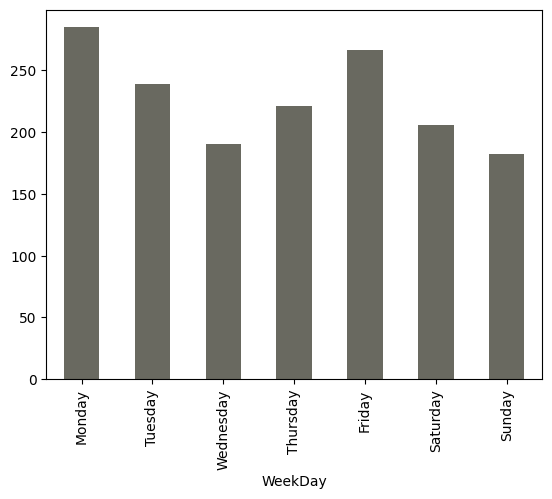

In [154]:
df_year.groupby('WeekDay')['Distance (km)'].sum().reindex(weekday_order).plot(kind='bar')

In [170]:
df_year.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='Greens')

,Distance (km),Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Steps
Distance (km),1.000000,-0.152236,0.147172,0.993189,0.578538,0.700698
Average Pace,-0.152236,1.000000,-0.995239,-0.135200,0.307705,0.195098
Average Speed (km/h),0.147172,-0.995239,1.000000,0.129677,-0.302457,-0.193696
Calories Burned,0.993189,-0.135200,0.129677,1.000000,0.645595,0.699704
Climb (m),0.578538,0.307705,-0.302457,0.645595,1.000000,0.483602
Steps,0.700698,0.195098,-0.193696,0.699704,0.483602,1.000000
